In [1]:
import pandas as pd


* Algumas constantes

In [2]:
area_cerrado_maranhense = 217029
area_cerrado_maranhense

217029

In [3]:
area_estado_ma = 329651
area_estado_ma

329651

In [4]:
area_cerrado_maranhense/ area_estado_ma

0.6583599018355776

## Carregando os dados

In [5]:
df = pd.read_csv('dados/csv/terrabrasilis_cerrado_5_18_2024,_11_26_39 AM.csv')
df.head()

,year,areakm,municipality,geocode_ibge,state
0,2000,42.515084,Afonso Cunha,2100105,Maranhão
1,2001,1.687509,Afonso Cunha,2100105,Maranhão
2,2002,1.687509,Afonso Cunha,2100105,Maranhão
3,2003,3.922876,Afonso Cunha,2100105,Maranhão
4,2004,3.922876,Afonso Cunha,2100105,Maranhão


* Para quais anos temos dados ?

In [6]:
df["year"].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

## Algumas perguntas inicias, sobre o desmatamento absoluto e relativo

* Qual o total de desmatamento no bioma ?

In [7]:
total_desmatamento = df["areakm"].sum()
print( total_desmatamento, total_desmatamento / area_cerrado_maranhense)

89880.3660872508 0.4141398895412632


* Qual o total de desmatamento no bioma, na mascara de 2000 ?

In [8]:
total_desmatamento_00 = df[df["year"] == 2000]["areakm"].sum()
print( total_desmatamento_00, total_desmatamento_00 / area_cerrado_maranhense)

41356.95237303544 0.19055956749114378


* Qual o total de desmatamento no bioma, de 2001 a 2023 ?

In [9]:
total_desmatamento_01_23 = df[df["year"] != 2000]["areakm"].sum()
print( total_desmatamento_01_23, total_desmatamento_01_23 / area_cerrado_maranhense)

48523.41371421536 0.2235803220501194


## Visualizando a evolução do desmatamento

In [10]:
df_por_ano = df.groupby("year")["areakm"].sum().reset_index().set_index("year")
df_por_ano

,areakm
year,
2000,41356.952373
2001,2338.595392
2002,2338.595392
2003,2908.182797
2004,2908.182797
2005,2431.024448
2006,2431.024448
2007,2961.520519
2008,2961.520519


In [11]:
df_por_ano["Percentual do Bioma"] = df_por_ano["areakm"] / area_cerrado_maranhense
df_por_ano

,areakm,Percentual do Bioma
year,,
2000,41356.952373,0.190560
2001,2338.595392,0.010775
2002,2338.595392,0.010775
2003,2908.182797,0.013400
2004,2908.182797,0.013400
2005,2431.024448,0.011201
2006,2431.024448,0.011201
2007,2961.520519,0.013646
2008,2961.520519,0.013646


* variação, ou aceleração

In [12]:
aceleracao_desmatamento = df_por_ano.pct_change().drop([2000, 2001]) * 100
aceleracao_desmatamento.head()

,areakm,Percentual do Bioma
year,,
2002,0.000000,0.000000
2003,24.355962,24.355962
2004,0.000000,0.000000
2005,-16.407440,-16.407440
2006,0.000000,0.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

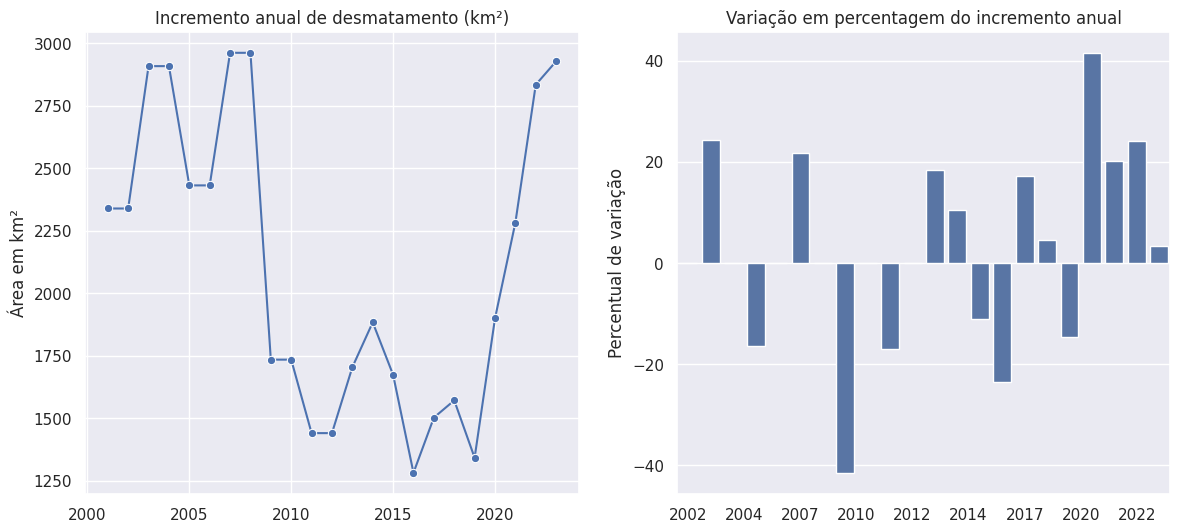

In [16]:
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
sns.lineplot(ax=axs[0], x='year', y='areakm', data=df_por_ano.drop(2000), marker='o', legend=False)

axs[0].set_title('Incremento anual de desmatamento (km²)')
axs[0].set_xlabel('')
axs[0].set_ylabel('Área em km²')


sns.barplot(ax=axs[1], x='year', y='areakm', data=aceleracao_desmatamento, )
axs[1].xaxis.set_major_locator(plt.AutoLocator())

axs[1].set(title='Variação em percentagem do incremento anual', xlabel='', ylabel='Percentual de variação')


plt.show()
